### Definición Formal del Coeficiente de Correlación de Gideon o de Mayor Desviación (GDCC).


El GDCC es un coeficiente de correlación que mide la relación entre dos variables aleatorias bivariadas. A diferencia de otros coeficientes de correlación, como Pearson o Kendall, el GDCC se enfoca en ser robusto frente a valores atípicos o extremos en los datos.

El GDCC se basa en la idea de que la correlación entre dos variables puede ser influenciada significativamente por valores atípicos. En lugar de utilizar todos los puntos de datos para calcular la correlación, el GDCC se concentra en el punto de datos que presenta la mayor desviación de una línea de regresión hipotética, haciendo que el coeficiente sea menos sensible a valores atípicos y, por lo tanto, más robusto.

**Definición Matemática:**
Dada una muestra de tamaño $ n $ y una permutación $ p_i $ de rangos de una variable dependiente asociada a cada valor de una variable independiente, el GDCC, denotado como $ r_{gd} $, se define como:

$$ r_{gd} = \frac{\max\limits_{1 \leq i \leq n} \left( \sum_{j=1}^{i} I(n+1+p_j > i) \right) - \max\limits_{1 \leq i \leq n} \left( \sum_{j=1}^{i} I(p_j > i) \right)}{\left\lfloor \frac{n}{2} \right\rfloor} $$

Donde:
- $ I $ es la función indicadora, que toma el valor 1 si la condición dentro de la función es verdadera y 0 si es falsa.
- El denominador $ \left\lfloor \frac{n}{2} \right\rfloor $ es la función del mayor entero menor o igual a $ n/2 $.

**Interpretación:**
- Valores de $ r_{gd} $ cercanos a 1 indican una fuerte correlación positiva.
- Valores cercanos a -1 indican una fuerte correlación negativa.
- Valores cercanos a 0 indican una ausencia de correlación o una correlación muy débil.


### Algoritmo para Calcular el (GDCC)

**Entrada:**
- Una lista $P$ de longitud $N$ que representa la permutación $p_i$ (los rangos de la variable dependiente correspondientes a cada valor de la variable independiente).

**Salida:**
- El valor del GDCC, denotado como $r_{gd}$.

**Pasos:**
1. **Inicializar Contadores:** 
   - Crear dos listas, $I\_sum\_R$ e $I\_sum\_L$, ambas de longitud $N$.
   
2. **Calcular las Sumas Indicadoras ($I\_sum\_R$ e $I\_sum\_L$):**
   - Para cada $i$ desde 1 hasta $N$:
     - Calcular $I\_sum\_R[i]$ como la suma de 1 para cada $j$ desde 1 hasta $i$ donde $p_j > i$.
     - Calcular $I\_sum\_L[i]$ como la suma de 1 para cada $j$ desde 1 hasta $i$ donde $N + 1 - p_j > i$.

3. **Encontrar los Valores Máximos de las Sumas Indicadoras:**
   - Encontrar el valor máximo de $I\_sum\_R$, denotado como $max\_I\_sum\_R$.
   - Encontrar el valor máximo de $I\_sum\_L$, denotado como $max\_I\_sum\_L$.

4. **Calcular el GDCC:**
   - Calcular $r_{gd}$ usando la fórmula:
     $$ r_{gd} = \frac{max\_I\_sum\_L - max\_I\_sum\_R}{\left\lfloor \frac{N}{2} \right\rfloor} $$

5. **Retornar el Valor de GDCC:**
   - Retornar $r_{gd}$.


Para más información, consulte el artículo en [https://www.tandfonline.com/doi/abs/10.1080/01621459.1987.10478480](https://www.tandfonline.com/doi/abs/10.1080/01621459.1987.10478480).

In [1]:
# Implementación del coeficiente de correlación Rg

import numpy as np
from itertools import product
import pandas as pd

def calculate_rg(ranks_var1, ranks_var2):
    """
    Calcula el coeficiente de correlación Rg para dos conjuntos de rangos.

    :param ranks_var1: Lista de rangos para la primera variable.
    :param ranks_var2: Lista de rangos para la segunda variable.
    :return: Coeficiente de correlación Rg.
    """

    # Número de elementos en las listas de rangos
    N = len(ranks_var1)
    # [N/2] es el mayor entero de N/2, usado en la fórmula de Rg
    half_N = np.floor(N / 2)

    # Convertir los rangos a enteros (si no lo son ya)
    ranks_var1 = [int(r) for r in ranks_var1]
    ranks_var2 = [int(r) for r in ranks_var2]

    # Emparejar los rangos de las dos variables y ordenarlos según la primera variable
    # Esto crea la permutación p, basada en los rangos ordenados de la segunda variable
    paired_ranks = sorted(zip(ranks_var1, ranks_var2), key=lambda x: x[0])
    p = [rank for _, rank in paired_ranks]

    # ε es la permutación inversa (N, N-1, ..., 1)
    epsilon = list(range(N, 0, -1))

    # Calcular d(p) y d(ε ∘ p), las desviaciones máximas para p y ε ∘ p
    d_p = max_deviation(p, N)
    d_epsilon_p = max_deviation(compose_permutations(epsilon, p), N)

    # Calcular Rg usando la fórmula (d(ε ∘ p) - d(p)) / [N/2]
    Rg = (d_epsilon_p - d_p) / half_N
    return Rg




def max_deviation(perm, N):
    """
    Calcula el máximo de las desviaciones d_i(p) para una permutación.

    :param perm: La permutación p o ε ∘ p.
    :param N: Número total de elementos en la permutación.
    :return: Máximo de las desviaciones d_i(p).
    """
    # Calcula d_i(p) como la suma de elementos en perm hasta i que son mayores que i
    d_i_values = [sum(1 for j in perm[:i] if j > i) for i in range(1, N + 1)]
    # Devuelve el máximo de los d_i(p)
    return max(d_i_values)

def compose_permutations(p1, p2):
    """
    Realiza la composición de dos permutaciones.

    :param p1: Primera permutación.
    :param p2: Segunda permutación.
    :return: Composición de p1 y p2.
    """
    # Realiza la composición p1 ∘ p2
    return [p1[p2[i] - 1] for i in range(len(p1))]


def calculate_rg_df(df):
    """
    Calcula el coeficiente de correlación Rg para cada par de columnas en un DataFrame de pandas.

    :param df: DataFrame de pandas con las columnas a comparar.
    :return: DataFrame de pandas que contiene la matriz de coeficientes de correlación Rg.
    """
    # Crear combinaciones de todas las columnas del DataFrame.
    # Esto permite comparar cada columna con todas las demás, incluyendo consigo misma.
    columnas = df.columns
    combinaciones = list(product(columnas, repeat=2))

    # Inicializar un DataFrame para almacenar los valores de Rg.
    # Este DataFrame tiene las mismas columnas y filas que el DataFrame original.
    rg_matrix = pd.DataFrame(np.nan, index=columnas, columns=columnas)

    # Iterar sobre cada combinación de columnas.
    for col1, col2 in combinaciones:
        # Calcular el coeficiente de correlación Rg para el par de columnas actual.
        rg_value = calculate_rg(df[col1].tolist(), df[col2].tolist())

        # Asignar el valor de Rg calculado a las entradas correspondientes en la matriz.
        # La matriz es simétrica, por lo que se actualizan ambos rg_matrix[col1, col2] y rg_matrix[col2, col1].
        rg_matrix.at[col1, col2] = rg_value
        rg_matrix.at[col2, col1] = rg_value
        
    # Devolver el DataFrame que contiene la matriz de coeficientes Rg.
    return rg_matrix


In [2]:
# Crear el DataFrame
Variable1 = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
Variable2 = [14,11,16,2,12,13,7,9,10,3,8,1,15,6,4,5]
Variable3 = [2, 7, 9, 10, 18, 5, 3, 15, 11, 8, 16, 14, 4, 1, 6, 13]

df = pd.DataFrame({
    'Variable1': pd.Series(Variable1).rank().tolist(),
    'Variable2': pd.Series(Variable2).rank().tolist(),
    'Variable3': pd.Series(Variable3).rank().tolist()

})

calculate_rg_df(df)

,Variable1,Variable2,Variable3
Variable1,1.000,-0.375,0.125
Variable2,-0.375,1.000,-0.125
Variable3,0.125,-0.125,1.000


# Simulación

[-1.00000000e+00 -9.00000000e-01 -8.00000000e-01 -7.00000000e-01
 -6.00000000e-01 -5.00000000e-01 -4.00000000e-01 -3.00000000e-01
 -2.00000000e-01 -1.00000000e-01 -2.22044605e-16  1.00000000e-01
  2.00000000e-01  3.00000000e-01  4.00000000e-01  5.00000000e-01
  6.00000000e-01  7.00000000e-01  8.00000000e-01  9.00000000e-01
  1.00000000e+00] 

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 

            X         Y
0   -0.496714  0.496714
1   -0.647689  0.647689
2    0.234153 -0.234153
3   -1.579213  1.579213
4    0.469474 -0.469474
..        ...       ...
995 -0.800410  0.800410
996 -1.188913  1.188913
997 -0.351448  0.351448
998  0.026521 -0.026521
999  0.163067 -0.163067

[1000 rows x 2 columns]
            X         Y
0    0.625767 -0.690398
1    0.703493 -0.841218
2    1.893361 -1.797973
3   -0.183882 -0.181532
4   -0.432906  0.852200
..        ...       ...
995  1.541034 -1.751790
996  2.093418 -1.757516
997  2.019157 -2.006431
998  1.953580 -2.096821
999 -1.5211

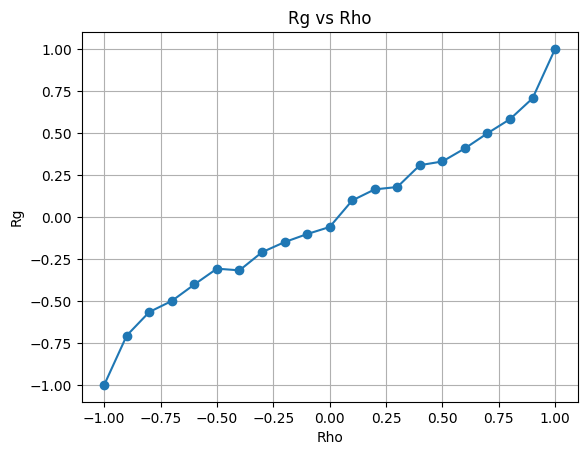

In [3]:
import matplotlib.pyplot as plt


# Plantar la semilla para generar números aleatorios reproducibles
np.random.seed(42)

# Generar vector de rho
rho = np.arange(-1, 1.1, 0.1)

print(rho, "\n")

# Prealocar vector para almacenar valores de Rg
rg_values = np.zeros(len(rho))

print(rg_values, "\n")


# Bucle para simular y calcular Rg
for i, r in enumerate(rho):
    # Generar muestra aleatoria normal
    mu = [0, 0]
    cov = [[1, r], [r, 1]]
    sample = np.random.multivariate_normal(mu, cov, 1000)

    # Convertir la muestra en un DataFrame y calcular Rg
    df = pd.DataFrame(sample, columns=["X", "Y"])
    print(df)
    rg_matrix = calculate_rg(df["X"].rank(), df["Y"].rank())

    # Almacenar el valor calculado de Rg
    rg_values[i] = rg_matrix

# Gráfica Rg vs rho
plt.plot(rho, rg_values, marker='o')
plt.xlabel('Rho')
plt.ylabel('Rg')
plt.title('Rg vs Rho')
plt.grid(True)
plt.show()

In [4]:
from scipy.stats import linregress

# rho y rg_values son tus datos
slope, intercept, r_value, p_value, std_err = linregress(rho, rg_values)

print("Intercepto (b):", intercept)
print("Pendiente (m):", slope)

Intercepto (b): -0.002380952380952217
Pendiente (m): 0.7977142857142859


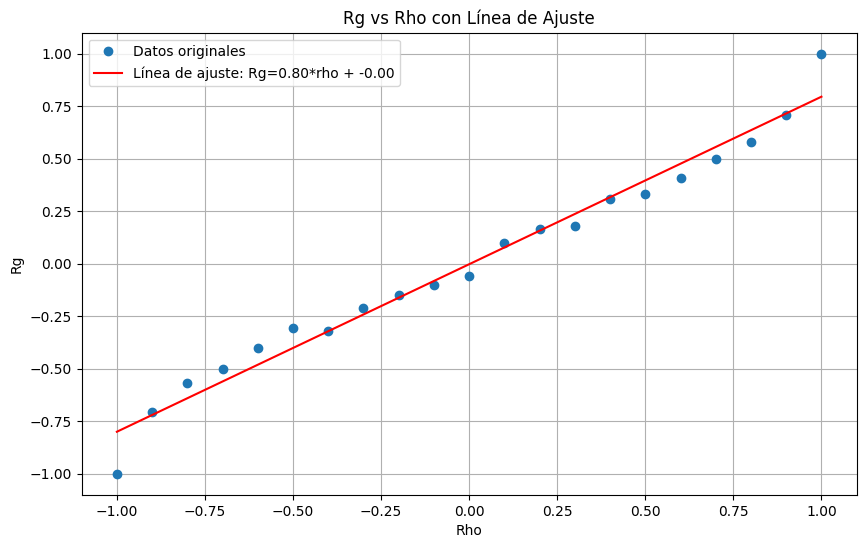

In [5]:
line = slope * rho + intercept
# Graficar los datos originales y la línea de regresión
plt.figure(figsize=(10, 6))
plt.plot(rho, rg_values, 'o', label='Datos originales')
plt.plot(rho, line, 'r', label=f'Línea de ajuste: Rg={slope:.2f}*rho + {intercept:.2f}')
plt.xlabel('Rho')
plt.ylabel('Rg')
plt.title('Rg vs Rho con Línea de Ajuste')
plt.legend()
plt.grid(True)
plt.show()